In [1]:
# Correction of data of Monitoring Units from Hospital of Leiria (from Hospital Sudoe 4.0 project)

# Version 07  (last updated: 14/09/2022)
# Author: Nuno Canha
# Goal of the script: using the input dataset of the monitored data by MB502, it provides excel files with corrected data based in correction factors.

# Time window analysed: August2021-July2022

# MONITORING BOX TO BE ANALISED: MB502

In [2]:
# To run this notebook, you will only need to:
# 1) Define the working folder
# 2) Enter the name of the Monitoring Unit that you are analysing

In [3]:
# To check the working folder and use "cd" to enter on the working folder

In [4]:
pwd

'C:\\Users\\nunocanha\\Desktop\\Hospital Sudoe 4.0\\Correction of Sensors data\\MB502'

In [5]:
#To enter in the correct folder:

In [6]:
cd C:\\Users\\nunocanha\\Desktop\\Hospital Sudoe 4.0\\Correction of Sensors data\\MB502

C:\Users\nunocanha\Desktop\Hospital Sudoe 4.0\Correction of Sensors data\MB502


In [7]:
# Loading the data
name = input('Which Monitoring Unit is being analised?')

Which Monitoring Unit is being analised? MB502


In [8]:
# Upload the analysis packages

In [9]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime

In [11]:
# Basic x-y plot
# this command is for the graphs to appear in the notebook
%matplotlib inline

In [12]:
# Upload the data to create a single dataset based on the single files provided by the monitoring box:

dataCO2 = pd.read_csv("co2.csv", delimiter=";", na_values=['NA'])
dataRH = pd.read_csv("humidity.csv", delimiter=";", na_values=['NA'])
dataT = pd.read_csv("temperature.csv", delimiter=";", na_values=['NA'])
dataVOCs = pd.read_csv("vocs.csv", delimiter=";", na_values=['NA'])
dataPM10 = pd.read_csv("pcpm10.csv", delimiter=";", na_values=['NA'])
dataPM25 = pd.read_csv("pcpm25.csv", delimiter=";", na_values=['NA'])
# No values (-999.0) were replaced by NaN in order to not interfere with the analysis

# To work on the timestamp:
dataCO2['Date']=pd.to_datetime(dataCO2['unix_timestamp'], unit='s')

# To put together all the data:
dataALL=pd.concat([dataCO2, dataRH, dataT, dataVOCs, dataPM10, dataPM25], axis=1)

# To select only the target parameters and the timestamp:
data=dataALL[["Date","co2_number","humidity_number","temperature_number","vocs_number", "pcpm25_number","pcpm10_number"]]
data = data.set_index('Date')

# To rename the columns' names to simplify the code writting 
new_names={'co2_number':'CO2','humidity_number':'RH','temperature_number': 'T', 'vocs_number': 'VOCs', 'pcpm25_number':'PM25', 'pcpm10_number':'PM10' }
data = data.rename(columns=new_names)
data

,CO2,RH,T,VOCs,PM25,PM10
Date,,,,,,
2020-09-11 15:04:54,890.0,34.65,27.69,21.0,9.0,10.0
2020-09-11 15:05:22,1055.0,34.12,27.76,39.0,0.0,1.0
2020-09-11 15:13:46,0.0,0.00,-0.86,0.0,10.0,11.0
2020-09-11 15:14:30,0.0,0.00,-0.86,0.0,0.0,1.0
2020-09-11 15:18:42,0.0,0.00,-0.86,0.0,7.0,8.0
...,...,...,...,...,...,...
2022-09-09 09:18:14,527.0,63.36,26.19,305.0,3.0,4.0
2022-09-09 09:23:15,653.0,63.48,26.24,266.0,4.0,5.0
2022-09-09 09:28:16,656.0,63.85,26.30,397.0,5.0,6.0


In [13]:
# Adicionar as etiquetas temporais:
# Add columns with year, month, and weekday name
data1=data
data1['Year'] = data1.index.year
data1['Month'] = data1.index.month
data1['Day'] = data1.index.day
data1['Hour'] = data1.index.hour
data1['Minute'] = data1.index.minute

data1

,CO2,RH,T,VOCs,PM25,PM10,Year,Month,Day,Hour,Minute
Date,,,,,,,,,,,
2020-09-11 15:04:54,890.0,34.65,27.69,21.0,9.0,10.0,2020,9,11,15,4
2020-09-11 15:05:22,1055.0,34.12,27.76,39.0,0.0,1.0,2020,9,11,15,5
2020-09-11 15:13:46,0.0,0.00,-0.86,0.0,10.0,11.0,2020,9,11,15,13
2020-09-11 15:14:30,0.0,0.00,-0.86,0.0,0.0,1.0,2020,9,11,15,14
2020-09-11 15:18:42,0.0,0.00,-0.86,0.0,7.0,8.0,2020,9,11,15,18
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09 09:18:14,527.0,63.36,26.19,305.0,3.0,4.0,2022,9,9,9,18
2022-09-09 09:23:15,653.0,63.48,26.24,266.0,4.0,5.0,2022,9,9,9,23
2022-09-09 09:28:16,656.0,63.85,26.30,397.0,5.0,6.0,2022,9,9,9,28


In [14]:
# Selecionar um período temporal e criar uma nova base de dados apenas com esse período

data2=data1[(data1.index > '2021-08-01 00:00:00')]
dataHL=data2[(data2.index < '2022-07-31 23:59:59')]
dataHL

# Export to csv
output_dataHL  = 'data_' + name + '_rawdata.csv'
dataHL.to_csv(output_dataHL, sep=',')

In [15]:
# Aplicar os factores de correção calculados

dataHL['CO2_c']=(dataHL['CO2']*0.9658)-50.514
dataHL['RH_c']=(dataHL['RH']*1.2376)-3.6385
dataHL['T_c']=(dataHL['T']*0.8609)+0.1843
dataHL['VOCs_c']=(dataHL['VOCs']*4.4538)-895.63
dataHL['PM25_c']=(dataHL['PM25']*3.4708)-9.3629
dataHL['PM10_c']=(dataHL['PM10']*3.4864)-12.15
dataHL

C:\Users\nunocanha\AppData\Local\Temp\ipykernel_27180\2041203452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataHL['CO2_c']=(dataHL['CO2']*0.9658)-50.514
C:\Users\nunocanha\AppData\Local\Temp\ipykernel_27180\2041203452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataHL['RH_c']=(dataHL['RH']*1.2376)-3.6385
C:\Users\nunocanha\AppData\Local\Temp\ipykernel_27180\2041203452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,CO2,RH,T,VOCs,PM25,PM10,Year,Month,Day,Hour,Minute,CO2_c,RH_c,T_c,VOCs_c,PM25_c,PM10_c
Date,,,,,,,,,,,,,,,,,
2021-08-01 00:02:37,460.0,50.91,24.11,283.0,14.0,15.0,2021,8,1,0,2,393.7540,59.367716,20.940599,364.7954,39.2283,40.1460
2021-08-01 00:07:32,454.0,51.23,23.95,327.0,15.0,16.0,2021,8,1,0,7,387.9592,59.763748,20.802855,560.7626,42.6991,43.6324
2021-08-01 00:12:35,460.0,51.12,24.03,358.0,12.0,13.0,2021,8,1,0,12,393.7540,59.627612,20.871727,698.8304,32.2867,33.1732
2021-08-01 00:17:37,496.0,51.24,24.01,336.0,13.0,14.0,2021,8,1,0,17,428.5228,59.776124,20.854509,600.8468,35.7575,36.6596
2021-08-01 00:22:38,522.0,51.01,24.13,301.0,16.0,17.0,2021,8,1,0,22,453.6336,59.491476,20.957817,444.9638,46.1699,47.1188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 23:38:27,588.0,56.08,27.01,371.0,12.0,13.0,2022,7,31,23,38,517.3764,65.766108,23.437209,756.7298,32.2867,33.1732
2022-07-31 23:43:28,564.0,55.46,27.02,327.0,11.0,12.0,2022,7,31,23,43,494.1972,64.998796,23.445818,560.7626,28.8159,29.6868
2022-07-31 23:48:29,523.0,55.27,27.05,266.0,12.0,13.0,2022,7,31,23,48,454.5994,64.763652,23.471645,289.0808,32.2867,33.1732


In [16]:
datac=dataHL.drop(['CO2','RH','T','VOCs','PM25','PM10'], axis=1)

# To rename the columns' names to simplify the code writting 
new_names2={'CO2_c':'CO2','RH_c':'RH','T_c': 'T', 'VOCs_c': 'VOCs', 'PM25_c':'PM25', 'PM10_c':'PM10' }
datac1 = datac.rename(columns=new_names2)

import numpy as np 
# Limpeza de dados: valores abaixo de 0 (para todos os parâmetros), excepto para CO2 (apenas valores acima de 380 ppm são mantidos):

datac2=datac1
datac2['VOCs']=datac2['VOCs'].mask(datac2['VOCs']<= 0)
datac2['T']=datac2['T'].mask(datac2['T']<= 0)
datac2['RH']=datac2['RH'].mask(datac2['RH']<= 0)
datac2['CO2']=datac2['CO2'].mask(datac2['CO2']<380)
datac2['PM25']=datac2['PM25'].mask(datac2['PM25']<=0)
datac2['PM25']=datac2['PM25'].mask(datac2['PM25']>500)
datac2['PM10']=datac2['PM10'].mask(datac2['PM10']<=0)
datac2['PM10']=datac2['PM10'].mask(datac2['PM10']>500)

datacf=datac2
datacf

,Year,Month,Day,Hour,Minute,CO2,RH,T,VOCs,PM25,PM10
Date,,,,,,,,,,,
2021-08-01 00:02:37,2021,8,1,0,2,393.7540,59.367716,20.940599,364.7954,39.2283,40.1460
2021-08-01 00:07:32,2021,8,1,0,7,387.9592,59.763748,20.802855,560.7626,42.6991,43.6324
2021-08-01 00:12:35,2021,8,1,0,12,393.7540,59.627612,20.871727,698.8304,32.2867,33.1732
2021-08-01 00:17:37,2021,8,1,0,17,428.5228,59.776124,20.854509,600.8468,35.7575,36.6596
2021-08-01 00:22:38,2021,8,1,0,22,453.6336,59.491476,20.957817,444.9638,46.1699,47.1188
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 23:38:27,2022,7,31,23,38,517.3764,65.766108,23.437209,756.7298,32.2867,33.1732
2022-07-31 23:43:28,2022,7,31,23,43,494.1972,64.998796,23.445818,560.7626,28.8159,29.6868
2022-07-31 23:48:29,2022,7,31,23,48,454.5994,64.763652,23.471645,289.0808,32.2867,33.1732


In [17]:
# Import seaborn for visualisation tools

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(14, 6)})

In [18]:
# Resampling CO2 data

# Resample getting a several statistics parameters - Daily data
dailyCO2 = datacf['CO2'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyCO2['Year'] = dailyCO2.index.year
dailyCO2['Month'] = dailyCO2.index.month
dailyCO2['Day'] = dailyCO2.index.day


# Export to csv
output_dailyCO2  = 'data_' + name + '_dailyCO2.csv'
dailyCO2.to_csv(output_dailyCO2 , sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyCO2 = datacf['CO2'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyCO2['Year'] = hourlyCO2.index.year
hourlyCO2['Month'] = hourlyCO2.index.month
hourlyCO2['Day'] = hourlyCO2.index.day
hourlyCO2['Hour'] = hourlyCO2.index.hour
hourlyCO2

# Export to csv
output_hourlyCO2  = 'data_' + name + '_hourlyCO2.csv'
hourlyCO2.to_csv(output_hourlyCO2 , sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyCO2 = datacf['CO2'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyCO2['Year'] = monthlyCO2.index.year
monthlyCO2['Month'] = monthlyCO2.index.month
monthlyCO2['Day'] = monthlyCO2.index.day
monthlyCO2

# Export to csv
output_monthlyCO2  = 'data_' + name + '_monthlyCO2.csv'
monthlyCO2.to_csv(output_monthlyCO2 , sep=',')

# Transpose the dataset:
series1 = pd.pivot_table(dailyCO2, index = 'Month', columns = 'Day', values = 'mean') 

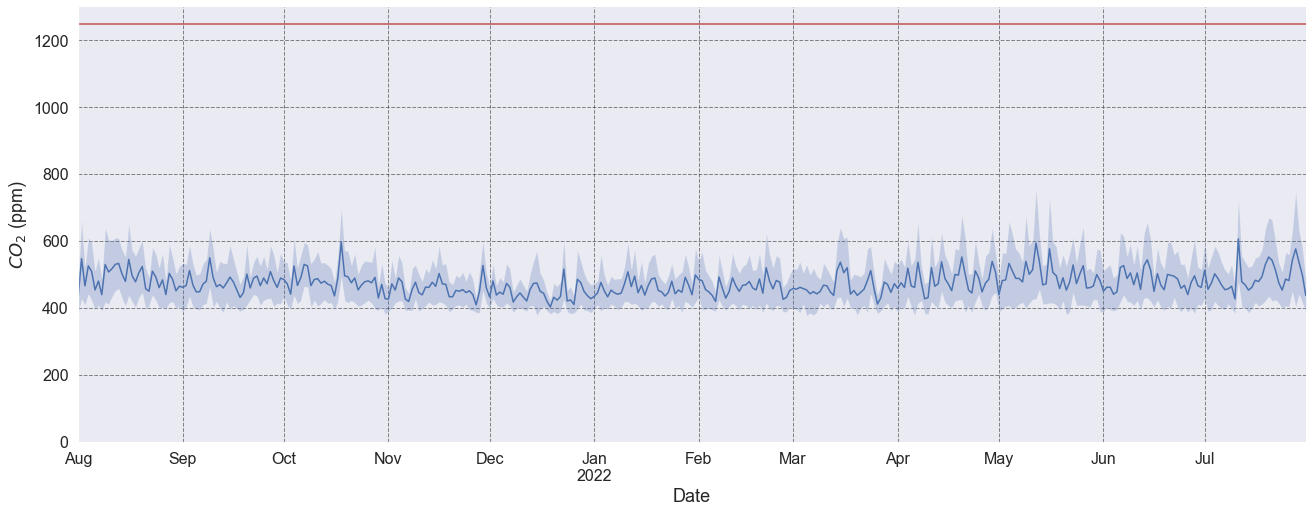

In [19]:
# Daily plot (Mean + SD) - All data

ax = dailyCO2['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyCO2.index, dailyCO2['mean'] - dailyCO2['std'], dailyCO2['mean'] + dailyCO2['std'], alpha=.25)
ax.axhline(y=1250, color='r', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,1300)

plt.ylabel("$CO_{2}$ (ppm)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig1a - Daily mean CO2 - all data @ '+ name) 



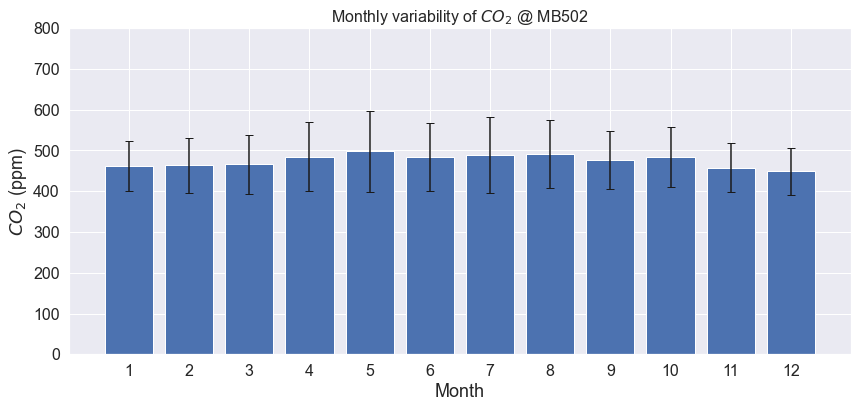

In [20]:
# Plot of box plots of daily CO2 data:

Fig1b, ax = plt.subplots()

ax.bar(x=monthlyCO2['Month'], #x-coordinates of bars
       height=monthlyCO2['mean'], #height of bars
       yerr=monthlyCO2['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel('$CO_{2}$ (ppm)',fontsize=18)
ax.set_title('Monthly variability of $CO_{2}$ @ '+ name, fontsize=16)
ax.set_ylim(0,800)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.xticks(monthlyCO2['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig1b - Monthly variability of CO2 @ '+ name)



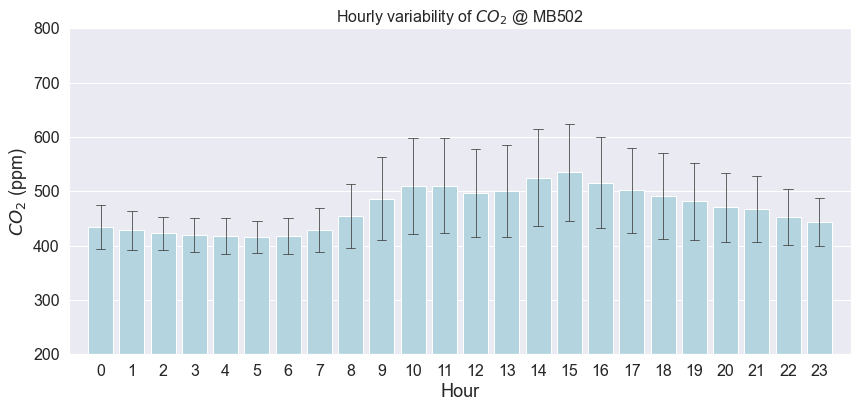

In [21]:
# Plot of box plots of Hourly data:
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

Fig1c = sns.barplot(x="Hour", y="CO2", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig1c.set_ylabel('$CO_{2}$ (ppm)',fontsize=18)
Fig1c.set_title('Hourly variability of $CO_{2}$ @ '+ name, fontsize=16)

Fig1c.tick_params(axis='x', labelsize=16)
Fig1c.tick_params(axis='y', labelsize=16)
Fig1c.set_ylim(200,800)
Fig1c.set_xlim(-1,24)

Fig1c.xaxis.set_major_formatter(ticker.EngFormatter())

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig1c - Hourly variability of CO2 @ '+ name)

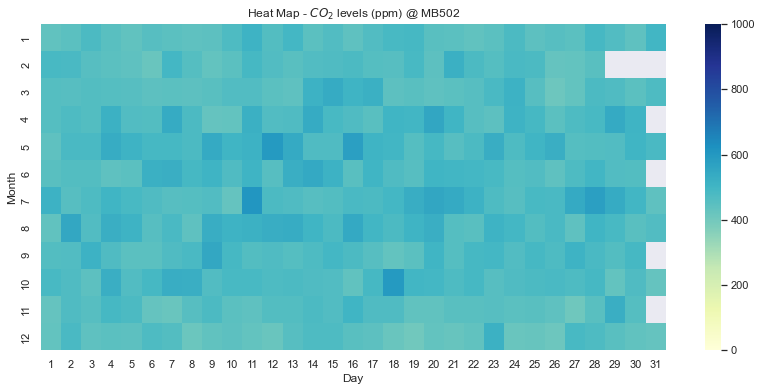

In [22]:
# Heatmap of daily data over months - CO2:

Fig1d = sns.heatmap(series1, vmin=0, vmax=1000, cmap="YlGnBu")
Fig1d.set_title('Heat Map - $CO_{2}$ levels (ppm) @ '+ name)
plt.savefig('Fig1d - Heat Map - CO2 levels @ '+ name)

In [23]:
# Evaluation of Temperature variability

# Resample getting a several statistics parameters - Daily data
dailyT = datacf['T'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyT['Year'] = dailyT.index.year
dailyT['Month'] = dailyT.index.month
dailyT['Day'] = dailyT.index.day


# Export to csv
output_dailyT  = 'data_' + name + '_dailyT.csv'
dailyT.to_csv(output_dailyT , sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyT = datacf['T'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyT['Year'] = hourlyT.index.year
hourlyT['Month'] = hourlyT.index.month
hourlyT['Day'] = hourlyT.index.day
hourlyT

# Export to csv
output_hourlyT  = 'data_' + name + '_hourlyT.csv'
hourlyT.to_csv(output_hourlyT , sep=',')

hourlyT

# Resample getting a several statistics parameters - Monthly data
monthlyT = datacf['T'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyT['Year'] = monthlyT.index.year
monthlyT['Month'] = monthlyT.index.month
monthlyT['Day'] = monthlyT.index.day
monthlyT

# Export to csv
output_monthlyT  = 'data_' + name + '_monthlyT.csv'
monthlyT.to_csv(output_monthlyT , sep=',')


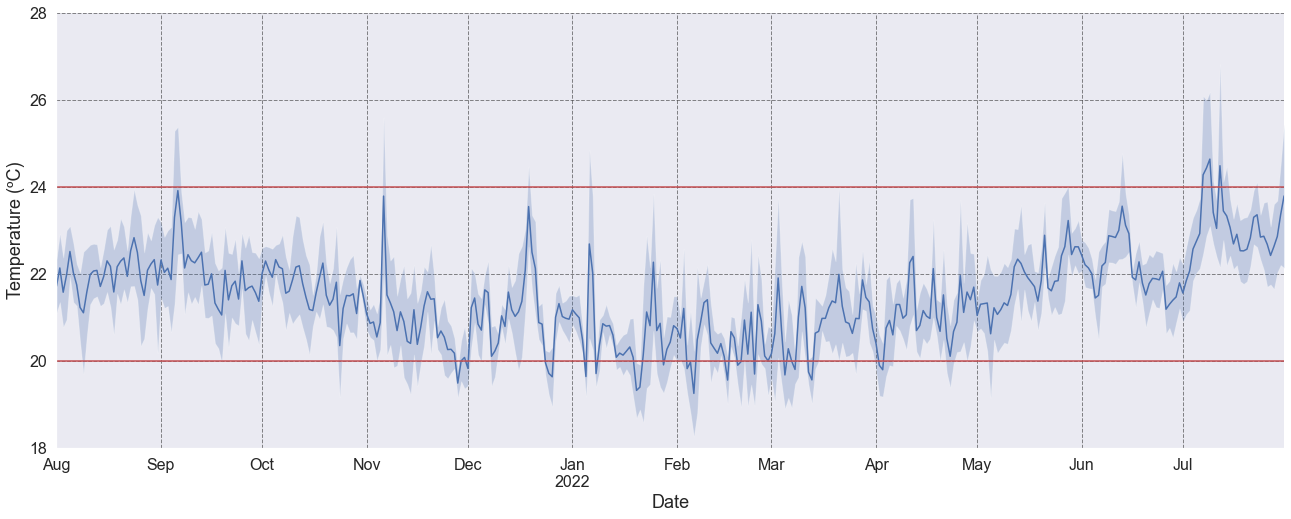

In [24]:
# Daily plot (Mean + SD) - All data - T

ax = dailyT['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyT.index, dailyT['mean'] - dailyT['std'], dailyT['mean'] + dailyT['std'], alpha=.25)
ax.axhline(y=20, color='r', linestyle='-')
ax.axhline(y=24, color='r', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(18,28)

plt.ylabel("Temperature (ºC)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig2a - Daily mean T - all data @ '+ name) 

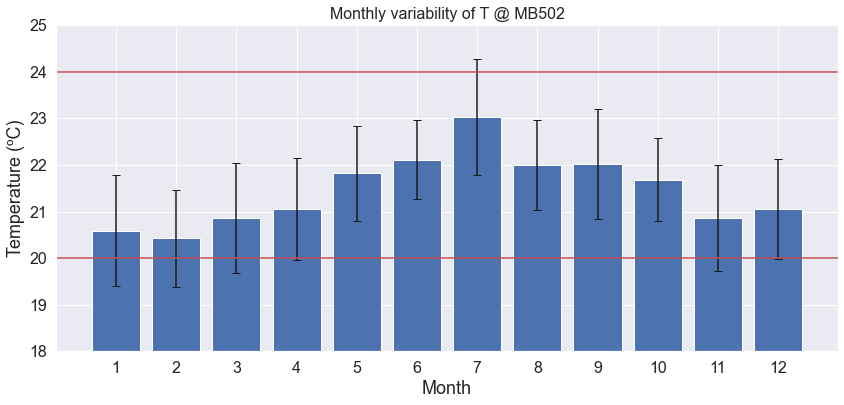

In [25]:
# Plot of box plots of daily T data:

Fig2b, ax = plt.subplots()

ax.bar(x=monthlyT['Month'], #x-coordinates of bars
       height=monthlyT['mean'], #height of bars
       yerr=monthlyT['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel('Temperature (ºC)',fontsize=18)
ax.set_title('Monthly variability of T @ '+ name, fontsize=16)
ax.set_ylim(18,25)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.axhline(y=20, color='r', linestyle='-')
ax.axhline(y=24, color='r', linestyle='-')

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig2b - Monthly variability of T @ '+ name)

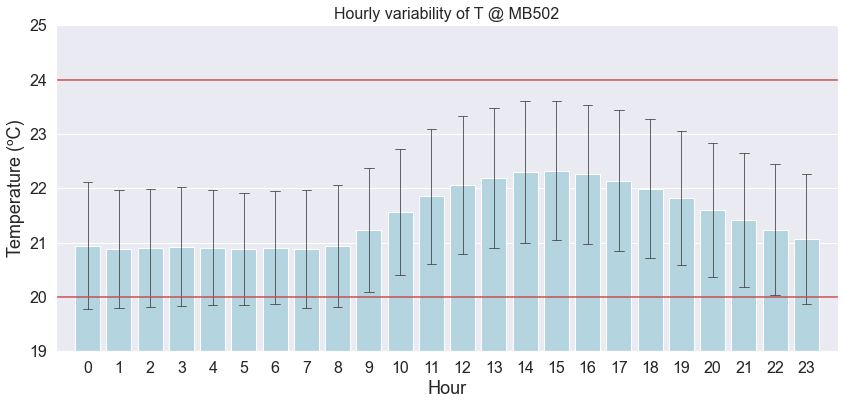

In [26]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig2c = sns.barplot(x="Hour", y="T", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig2c.set_ylabel('Temperature (ºC)',fontsize=18)
Fig2c.set_title('Hourly variability of T @ '+ name, fontsize=16)

Fig2c.tick_params(axis='x', labelsize=16)
Fig2c.tick_params(axis='y', labelsize=16)
Fig2c.set_ylim(19,25)
Fig2c.set_xlim(-1,24)

Fig2c.xaxis.set_major_formatter(ticker.EngFormatter())

Fig2c.axhline(y=20, color='r', linestyle='-')
Fig2c.axhline(y=24, color='r', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig2c - Hourly variability of T @ '+ name)

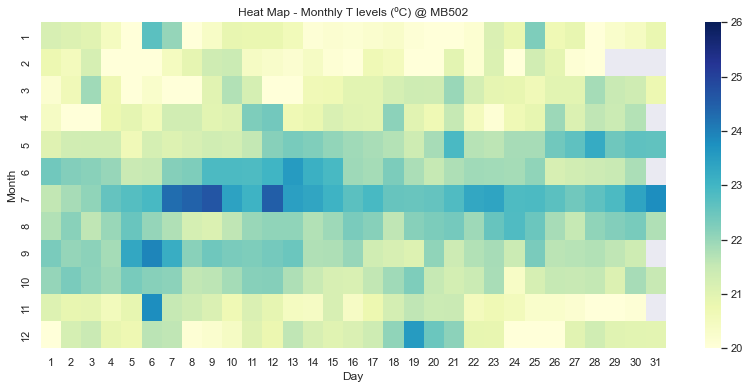

In [27]:
#Heat Map

# Transpose the dataset:

series2 = pd.pivot_table(dailyT, index = 'Month', columns = 'Day', values = 'mean') 
Fig2d = sns.heatmap(series2, vmin=20, vmax=26, cmap="YlGnBu")
Fig2d.set_title('Heat Map - Monthly T levels (ºC) @ '+ name)
plt.savefig('Fig2d - Heat Map - T levels @ '+ name)

In [28]:
# Evaluation of VOCs variability

# Resample getting a several statistics parameters - Daily data
dailyVOCs = datacf['VOCs'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyVOCs['Year'] = dailyVOCs.index.year
dailyVOCs['Month'] = dailyVOCs.index.month
dailyVOCs['Day'] = dailyVOCs.index.day


# Export to csv
output_dailyVOCs  = 'data_' + name + '_dailyVOCs.csv'
dailyVOCs.to_csv(output_dailyVOCs , sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyVOCs = datacf['VOCs'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyVOCs['Year'] = hourlyVOCs.index.year
hourlyVOCs['Month'] = hourlyVOCs.index.month
hourlyVOCs['Day'] = hourlyVOCs.index.day
hourlyVOCs

# Export to csv
output_hourlyVOCs  = 'data_' + name + '_hourlyVOCs.csv'
hourlyVOCs.to_csv(output_hourlyVOCs , sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyVOCs = datacf['VOCs'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyVOCs['Year'] = monthlyVOCs.index.year
monthlyVOCs['Month'] = monthlyVOCs.index.month
monthlyVOCs['Day'] = monthlyVOCs.index.day

# Export to csv
output_monthlyVOCs  = 'data_' + name + '_monthlyVOCs.csv'
monthlyVOCs.to_csv(output_monthlyVOCs, sep=',')

monthlyVOCs

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2021-08-31,554.610658,422.788007,8739,462.7790,17.399,3535.9010,2021,8,31
2021-09-30,518.679823,423.586568,8183,422.6948,17.399,3478.0016,2021,9,30
2021-10-31,497.725707,402.183203,8638,404.8796,17.399,3304.3034,2021,10,31
2021-11-30,459.249278,371.031240,7673,387.0644,17.399,3518.0858,2021,11,30
2021-12-31,557.829570,420.836319,8291,462.7790,17.399,3460.1864,2021,12,31
2022-01-31,583.492635,439.802384,7767,502.8632,17.399,3535.9010,2022,1,31
2022-02-28,453.677083,364.128164,6899,364.7954,17.399,3478.0016,2022,2,28
2022-03-31,343.956801,318.137158,5807,248.9966,17.399,3126.1514,2022,3,31
2022-04-30,387.806448,377.746055,5888,289.0808,17.399,3437.9174,2022,4,30


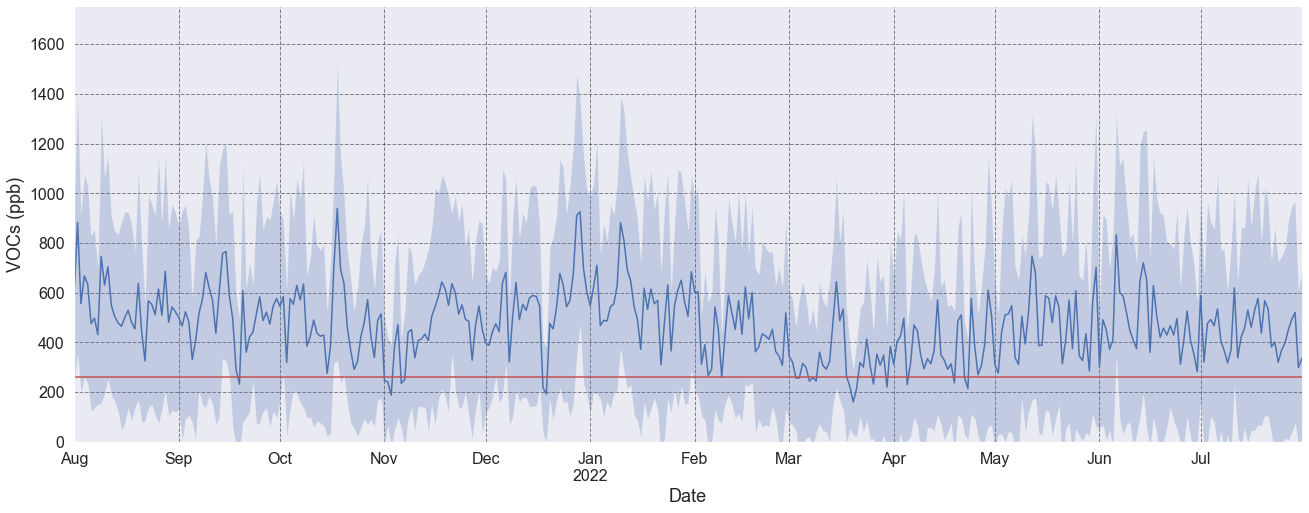

In [29]:
# Daily plot (Mean + SD) - All data - VOCs

ax = dailyVOCs['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyVOCs.index, dailyVOCs['mean'] - dailyVOCs['std'], dailyVOCs['mean'] + dailyVOCs['std'], alpha=.25)
ax.axhline(y=262, color='r', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,1750)

plt.ylabel("VOCs (ppb)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig3a - Daily mean VOCs - all data @ '+ name) 

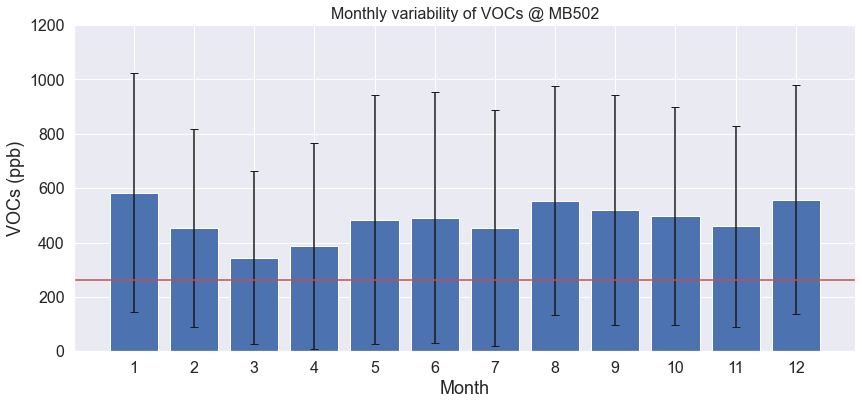

In [30]:
# Plot of box plots of daily VOCs data:

Fig3b, ax = plt.subplots()

ax.bar(x=monthlyVOCs['Month'], #x-coordinates of bars
       height=monthlyVOCs['mean'], #height of bars
       yerr=monthlyVOCs['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel('VOCs (ppb)',fontsize=18)
ax.set_title('Monthly variability of VOCs @ '+ name, fontsize=16)
ax.set_ylim(0,1200)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.axhline(y=262, color='r', linestyle='-')

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig3b - Monthly variability of VOCs @ '+ name)

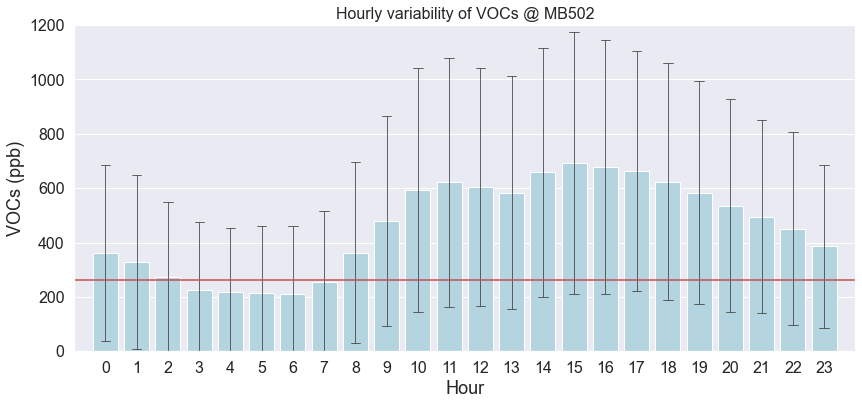

In [31]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig3c = sns.barplot(x="Hour", y="VOCs", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig3c.set_ylabel('VOCs (ppb)',fontsize=18)
Fig3c.set_title('Hourly variability of VOCs @ '+ name, fontsize=16)

Fig3c.tick_params(axis='x', labelsize=16)
Fig3c.tick_params(axis='y', labelsize=16)
Fig3c.set_ylim(0,1200)
Fig3c.set_xlim(-1,24)

Fig3c.xaxis.set_major_formatter(ticker.EngFormatter())
Fig3c.axhline(y=262, color='r', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig3c - Hourly variability of VOCs @ '+ name)

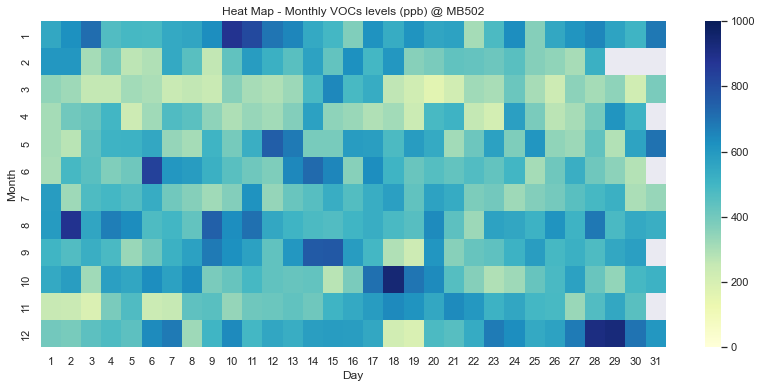

In [32]:
#Heat Map

# Transpose the dataset:

series3 = pd.pivot_table(dailyVOCs, index = 'Month', columns = 'Day', values = 'mean') 
Fig3d = sns.heatmap(series3, vmin=0, vmax=1000, cmap="YlGnBu")
Fig3d.set_title('Heat Map - Monthly VOCs levels (ppb) @ '+ name)
plt.savefig('Fig3d - Heat Map - VOCs levels @ '+ name)

In [33]:
# Evaluation of PM2.5 variability

# Resample getting a several statistics parameters - Daily data
dailyPM25 = datacf['PM25'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyPM25['Year'] = dailyPM25.index.year
dailyPM25['Month'] = dailyPM25.index.month
dailyPM25['Day'] = dailyPM25.index.day


# Export to csv
output_dailyPM25  = 'data_' + name + '_dailyPM25.csv'
dailyPM25.to_csv(output_dailyPM25, sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyPM25 = datacf['PM25'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyPM25['Year'] = hourlyPM25.index.year
hourlyPM25['Month'] = hourlyPM25.index.month
hourlyPM25['Day'] = hourlyPM25.index.day
hourlyPM25

# Export to csv
output_hourlyPM25  = 'data_' + name + '_hourlyPM25.csv'
hourlyPM25.to_csv(output_hourlyPM25, sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyPM25 = datacf['PM25'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyPM25['Year'] = monthlyPM25.index.year
monthlyPM25['Month'] = monthlyPM25.index.month
monthlyPM25['Day'] = monthlyPM25.index.day

# Export to csv
output_monthlyPM25  = 'data_' + name + '_monthlyPM25.csv'
monthlyPM25.to_csv(output_monthlyPM25, sep=',')

monthlyPM25

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2021-08-31,28.593393,18.419702,8860,25.3451,1.0495,198.8851,2021,8,31
2021-09-30,24.364009,18.596542,8494,18.4035,1.0495,237.0639,2021,9,30
2021-10-31,30.445892,19.441377,8841,25.3451,1.0495,219.7099,2021,10,31
2021-11-30,67.185746,55.182322,8575,49.6407,1.0495,303.0091,2021,11,30
2021-12-31,38.978195,37.861691,8826,25.3451,1.0495,299.5383,2021,12,31
2022-01-31,67.274868,59.774150,8870,46.1699,1.0495,303.0091,2022,1,31
2022-02-28,70.571018,55.175478,7993,56.5823,1.0495,299.5383,2022,2,28
2022-03-31,39.365955,31.487009,8850,32.2867,1.0495,250.9471,2022,3,31
2022-04-30,22.642791,15.929079,8545,18.4035,1.0495,132.9399,2022,4,30


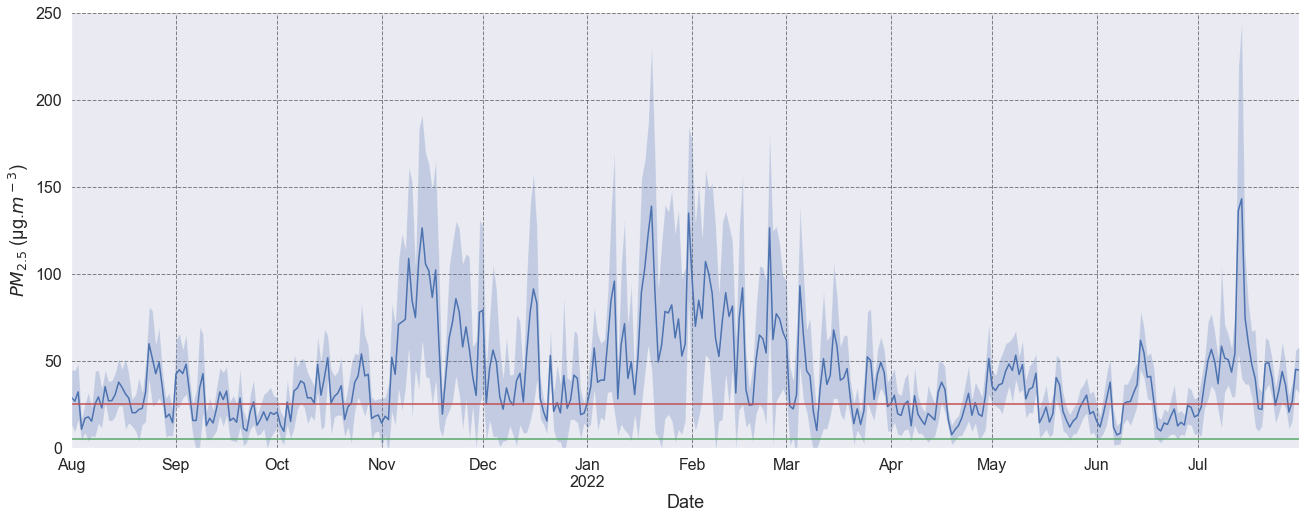

In [34]:
# Daily plot (Mean + SD) - All data - PM2.5

ax = dailyPM25['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyPM25.index, dailyPM25['mean'] - dailyPM25['std'], dailyPM25['mean'] + dailyPM25['std'], alpha=.25)
ax.axhline(y=25, color='r', linestyle='-')
ax.axhline(y=5, color='g', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,250)

plt.ylabel("$PM_{2.5}$ (μg.$m^-$$^3$)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig4a - Daily mean PM25 - all data @ '+ name) 

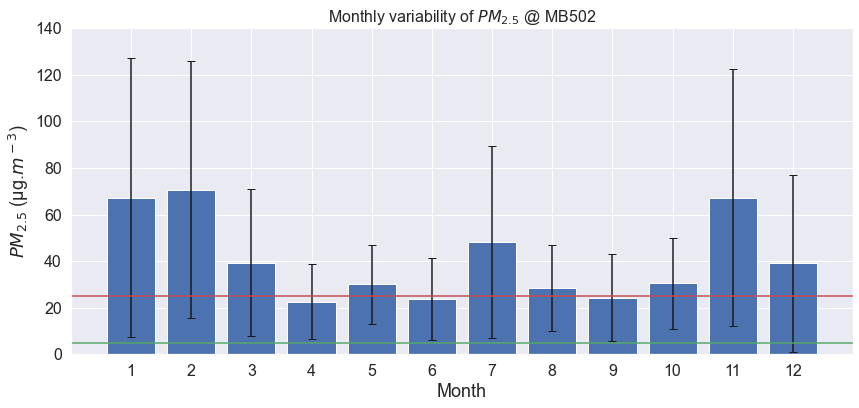

In [35]:
# Plot of box plots of daily PM2.5 data:

Fig4b, ax = plt.subplots()

ax.bar(x=monthlyPM25['Month'], #x-coordinates of bars
       height=monthlyPM25['mean'], #height of bars
       yerr=monthlyPM25['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel("$PM_{2.5}$ (μg.$m^-$$^3$)",fontsize=18)
ax.set_title('Monthly variability of $PM_{2.5}$ @ '+ name, fontsize=16)
ax.set_ylim(0,140)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.axhline(y=25, color='r', linestyle='-')
ax.axhline(y=5, color='g', linestyle='-')

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig4b - Monthly variability of PM25 @ '+ name)

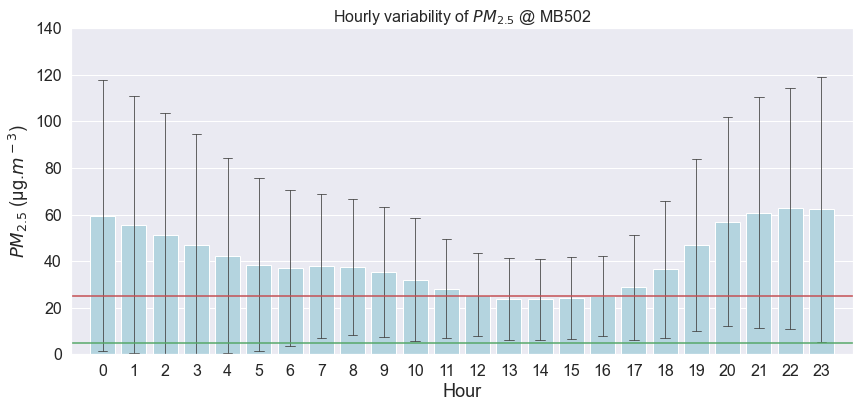

In [36]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig4c = sns.barplot(x="Hour", y="PM25", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig4c.set_ylabel('$PM_{2.5}$ (μg.$m^-$$^3$)',fontsize=18)
Fig4c.set_title('Hourly variability of $PM_{2.5}$ @ '+ name, fontsize=16)

Fig4c.tick_params(axis='x', labelsize=16)
Fig4c.tick_params(axis='y', labelsize=16)
Fig4c.set_ylim(0,140)
Fig4c.set_xlim(-1,24)

Fig4c.xaxis.set_major_formatter(ticker.EngFormatter())
Fig4c.axhline(y=25, color='r', linestyle='-')
Fig4c.axhline(y=5, color='g', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig4c - Hourly variability of PM25 @ '+ name)

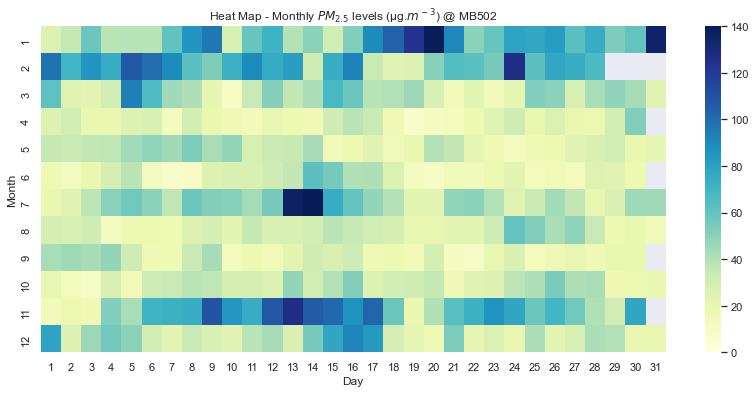

In [37]:
#Heat Map

# Transpose the dataset:

series4 = pd.pivot_table(dailyPM25, index = 'Month', columns = 'Day', values = 'mean') 
Fig4d = sns.heatmap(series4, vmin=0, vmax=140, cmap="YlGnBu")
Fig4d.set_title('Heat Map - Monthly $PM_{2.5}$ levels (μg.$m^-$$^3$) @ '+ name)
plt.savefig('Fig4d - Heat Map - PM25 levels @ '+ name)

In [38]:
# Evaluation of PM10 variability

# Resample getting a several statistics parameters - Daily data
dailyPM10 = datacf['PM10'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyPM10['Year'] = dailyPM25.index.year
dailyPM10['Month'] = dailyPM25.index.month
dailyPM10['Day'] = dailyPM25.index.day


# Export to csv
output_dailyPM10  = 'data_' + name + '_dailyPM10.csv'
dailyPM10.to_csv(output_dailyPM10, sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyPM10 = datacf['PM10'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyPM10['Year'] = hourlyPM10.index.year
hourlyPM10['Month'] = hourlyPM10.index.month
hourlyPM10['Day'] = hourlyPM10.index.day
hourlyPM10

# Export to csv
output_hourlyPM10  = 'data_' + name + '_hourlyPM10.csv'
hourlyPM10.to_csv(output_hourlyPM10, sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyPM10 = datacf['PM10'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyPM10['Year'] = monthlyPM10.index.year
monthlyPM10['Month'] = monthlyPM10.index.month
monthlyPM10['Day'] = monthlyPM10.index.day

# Export to csv
output_monthlyPM10  = 'data_' + name + '_monthlyPM10.csv'
monthlyPM10.to_csv(output_monthlyPM10, sep=',')

monthlyPM10

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2021-08-31,29.553404,18.812037,8860,26.2004,1.7956,204.0068,2021,8,31
2021-09-30,25.278109,18.933470,8494,19.2276,1.7956,242.3572,2021,9,30
2021-10-31,31.405353,19.820526,8841,26.2004,1.7956,224.9252,2021,10,31
2021-11-30,69.526899,56.831942,8575,50.6052,1.7956,308.5988,2021,11,30
2021-12-31,40.380244,39.044208,8826,26.2004,1.7956,305.1124,2021,12,31
2022-01-31,69.442766,61.411888,8870,47.1188,1.7956,308.5988,2022,1,31
2022-02-28,73.004001,56.852487,7993,57.5780,1.7956,305.1124,2022,2,28
2022-03-31,40.717218,32.544339,8850,33.1732,1.7956,256.3028,2022,3,31
2022-04-30,23.507161,16.090253,8545,19.2276,1.7956,137.7652,2022,4,30


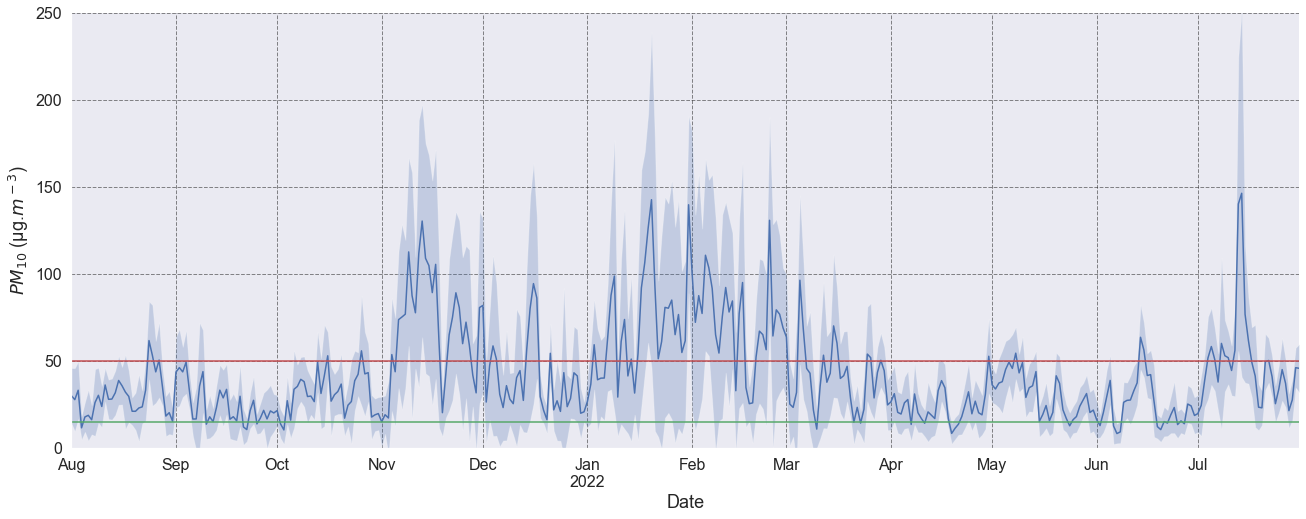

In [39]:
# Daily plot (Mean + SD) - All data - PM10

ax = dailyPM10['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyPM10.index, dailyPM10['mean'] - dailyPM10['std'], dailyPM10['mean'] + dailyPM10['std'], alpha=.25)
ax.axhline(y=50, color='r', linestyle='-')
ax.axhline(y=15, color='g', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,250)

plt.ylabel("$PM_{10}$ (μg.$m^-$$^3$)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig5a - Daily mean PM10 - all data @ '+ name) 

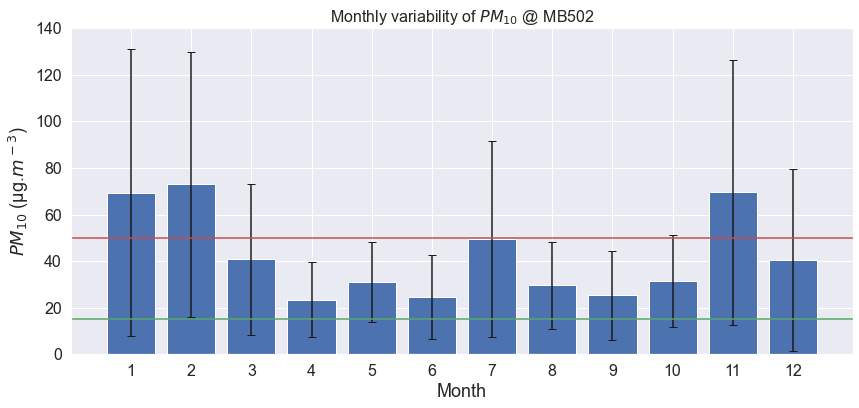

In [40]:
# Plot of box plots of daily PM2.5 data:

Fig5b, ax = plt.subplots()

ax.bar(x=monthlyPM10['Month'], #x-coordinates of bars
       height=monthlyPM10['mean'], #height of bars
       yerr=monthlyPM10['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel("$PM_{10}$ (μg.$m^-$$^3$)",fontsize=18)
ax.set_title('Monthly variability of $PM_{10}$ @ '+ name, fontsize=16)
ax.set_ylim(0,140)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.axhline(y=50, color='r', linestyle='-')
ax.axhline(y=15, color='g', linestyle='-')

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig5b - Monthly variability of PM10 @ '+ name)

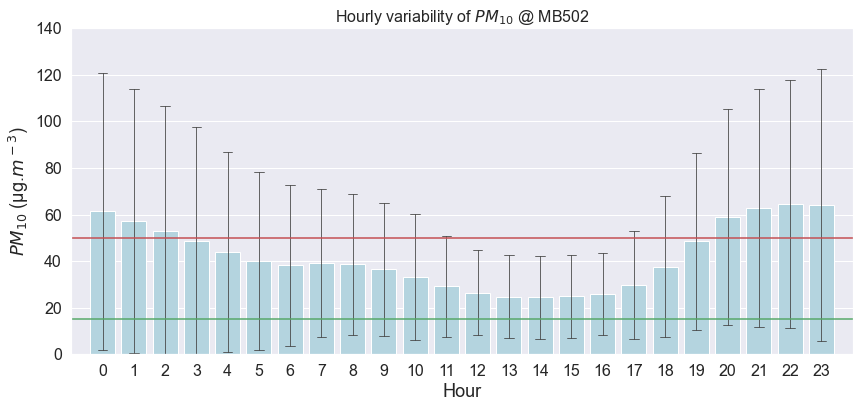

In [41]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig5c = sns.barplot(x="Hour", y="PM10", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig5c.set_ylabel('$PM_{10}$ (μg.$m^-$$^3$)',fontsize=18)
Fig5c.set_title('Hourly variability of $PM_{10}$ @ '+ name, fontsize=16)

Fig5c.tick_params(axis='x', labelsize=16)
Fig5c.tick_params(axis='y', labelsize=16)
Fig5c.set_ylim(0,140)
Fig5c.set_xlim(-1,24)

Fig5c.xaxis.set_major_formatter(ticker.EngFormatter())
Fig5c.axhline(y=50, color='r', linestyle='-')
Fig5c.axhline(y=15, color='g', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig5c - Hourly variability of PM10 @ '+ name)

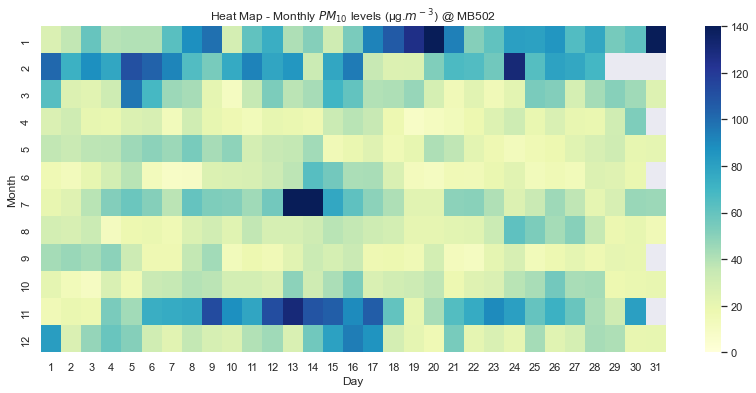

In [42]:
#Heat Map

# Transpose the dataset:

series5 = pd.pivot_table(dailyPM10, index = 'Month', columns = 'Day', values = 'mean') 
Fig5d = sns.heatmap(series5, vmin=0, vmax=140, cmap="YlGnBu")
Fig5d.set_title('Heat Map - Monthly $PM_{10}$ levels (μg.$m^-$$^3$) @ '+ name)
plt.savefig('Fig5d - Heat Map - PM10 levels @ '+ name)

In [43]:
# Evaluation of RH variability

# Resample getting a several statistics parameters - Daily data
dailyRH = datacf['RH'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyRH['Year'] = dailyRH.index.year
dailyRH['Month'] = dailyRH.index.month
dailyRH['Day'] = dailyRH.index.day


# Export to csv
output_dailyRH  = 'data_' + name + '_dailyRH.csv'
dailyRH.to_csv(output_dailyRH, sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyRH = datacf['RH'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyRH['Year'] = hourlyRH.index.year
hourlyRH['Month'] = hourlyRH.index.month
hourlyRH['Day'] = hourlyRH.index.day
hourlyRH

# Export to csv
output_hourlyRH  = 'data_' + name + '_hourlyRH.csv'
hourlyRH.to_csv(output_hourlyRH, sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyRH = datacf['RH'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyRH['Year'] = monthlyRH.index.year
monthlyRH['Month'] = monthlyRH.index.month
monthlyRH['Day'] = monthlyRH.index.day

# Export to csv
output_monthlyRH  = 'data_' + name + '_monthlyRH.csv'
monthlyRH.to_csv(output_monthlyRH, sep=',')

monthlyRH

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2021-08-31,63.418053,5.945283,8925,63.810700,44.207116,85.468700,2021,8,31
2021-09-30,62.829456,9.016340,8628,63.080516,34.640468,88.575076,2021,9,30
2021-10-31,57.179557,10.568174,8923,55.939564,30.704900,84.998412,2021,10,31
2021-11-30,42.072186,8.743958,8627,40.816092,22.375852,79.750988,2021,11,30
2021-12-31,49.449389,10.925034,8924,50.283732,25.940140,74.355052,2021,12,31
2022-01-31,37.857663,9.345426,8915,36.038956,18.328900,62.733988,2022,1,31
2022-02-28,40.683942,8.401437,8050,39.590868,20.989740,62.201820,2022,2,28
2022-03-31,44.861880,7.219426,8917,44.739284,23.229796,62.659732,2022,3,31
2022-04-30,45.786650,9.107094,8626,46.502864,19.690260,68.723972,2022,4,30


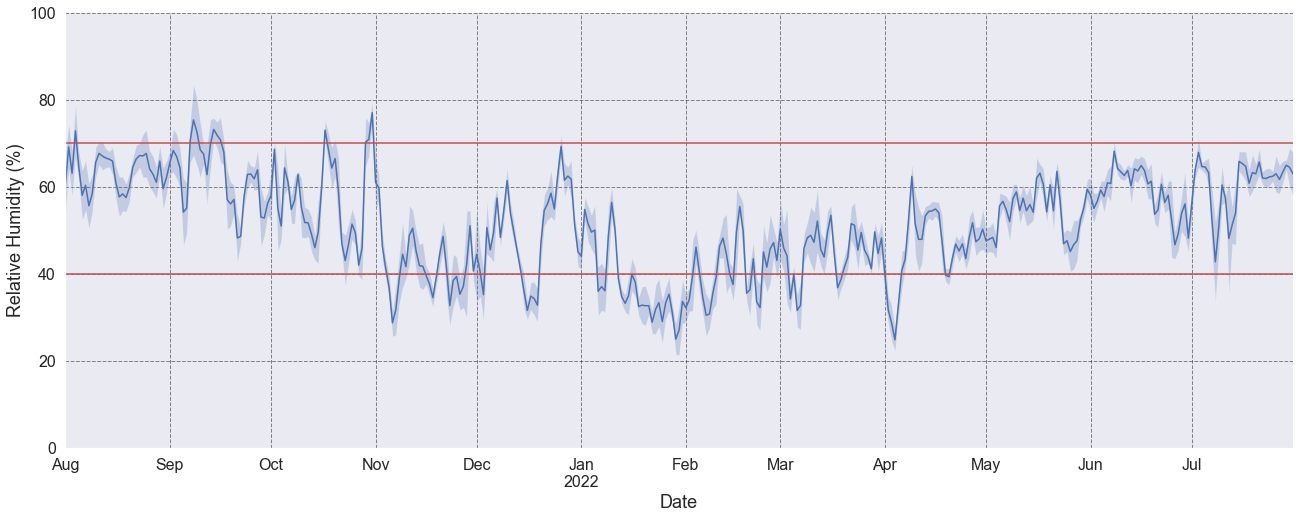

In [44]:
# Daily plot (Mean + SD) - All data - RH

ax = dailyRH['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyRH.index, dailyRH['mean'] - dailyRH['std'], dailyRH['mean'] + dailyRH['std'], alpha=.25)
ax.axhline(y=40, color='r', linestyle='-')
ax.axhline(y=70, color='r', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,100)

plt.ylabel("Relative Humidity (%)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig6a - Daily mean RH - all data @ '+ name) 

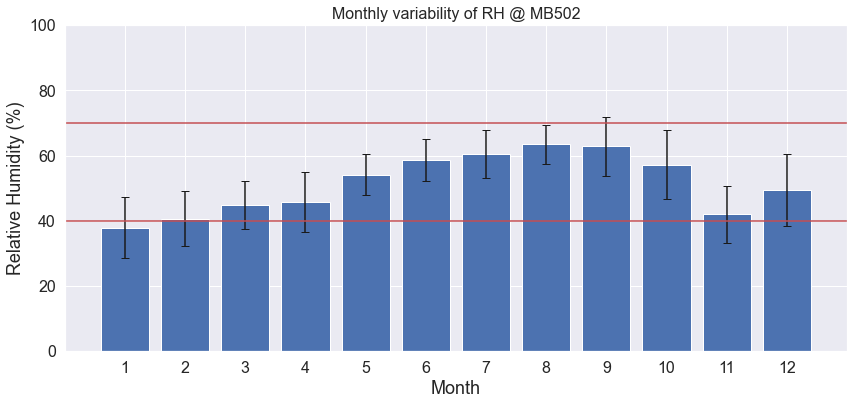

In [45]:
# Plot of box plots of daily PM2.5 data:

Fig6b, ax = plt.subplots()

ax.bar(x=monthlyRH['Month'], #x-coordinates of bars
       height=monthlyRH['mean'], #height of bars
       yerr=monthlyRH['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel("Relative Humidity (%)",fontsize=18)
ax.set_title('Monthly variability of RH @ '+ name, fontsize=16)
ax.set_ylim(0,100)
ax.axhline(y=40, color='r', linestyle='-')
ax.axhline(y=70, color='r', linestyle='-')
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig6b - Monthly variability of RH @ '+ name)

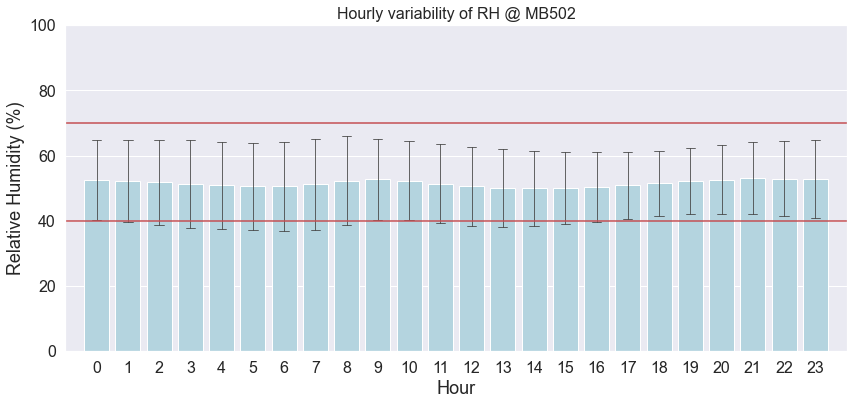

In [46]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig6c = sns.barplot(x="Hour", y="RH", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig6c.set_ylabel("Relative Humidity (%)",fontsize=18)
Fig6c.set_title('Hourly variability of RH @ '+ name, fontsize=16)

Fig6c.tick_params(axis='x', labelsize=16)
Fig6c.tick_params(axis='y', labelsize=16)
Fig6c.set_ylim(0,100)
Fig6c.set_xlim(-1,24)

Fig6c.xaxis.set_major_formatter(ticker.EngFormatter())
Fig6c.axhline(y=40, color='r', linestyle='-')
Fig6c.axhline(y=70, color='r', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig6c - Hourly variability of RH @ '+ name)

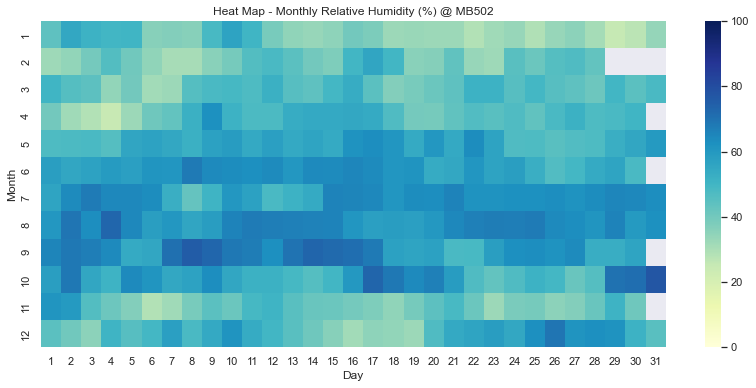

In [47]:
#Heat Map

# Transpose the dataset:

series6 = pd.pivot_table(dailyRH, index = 'Month', columns = 'Day', values = 'mean') 
Fig6d = sns.heatmap(series6, vmin=0, vmax=100, cmap="YlGnBu")
Fig6d.set_title('Heat Map - Monthly Relative Humidity (%) @ '+ name)
plt.savefig('Fig6d - Heat Map - RH levels @ '+ name)

In [48]:
datacfCorr = datacf.drop(['Year','Month','Day','Hour','Minute'], axis = 1)
datacfCorr

,CO2,RH,T,VOCs,PM25,PM10
Date,,,,,,
2021-08-01 00:02:37,393.7540,59.367716,20.940599,364.7954,39.2283,40.1460
2021-08-01 00:07:32,387.9592,59.763748,20.802855,560.7626,42.6991,43.6324
2021-08-01 00:12:35,393.7540,59.627612,20.871727,698.8304,32.2867,33.1732
2021-08-01 00:17:37,428.5228,59.776124,20.854509,600.8468,35.7575,36.6596
2021-08-01 00:22:38,453.6336,59.491476,20.957817,444.9638,46.1699,47.1188
...,...,...,...,...,...,...
2022-07-31 23:38:27,517.3764,65.766108,23.437209,756.7298,32.2867,33.1732
2022-07-31 23:43:28,494.1972,64.998796,23.445818,560.7626,28.8159,29.6868
2022-07-31 23:48:29,454.5994,64.763652,23.471645,289.0808,32.2867,33.1732


C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

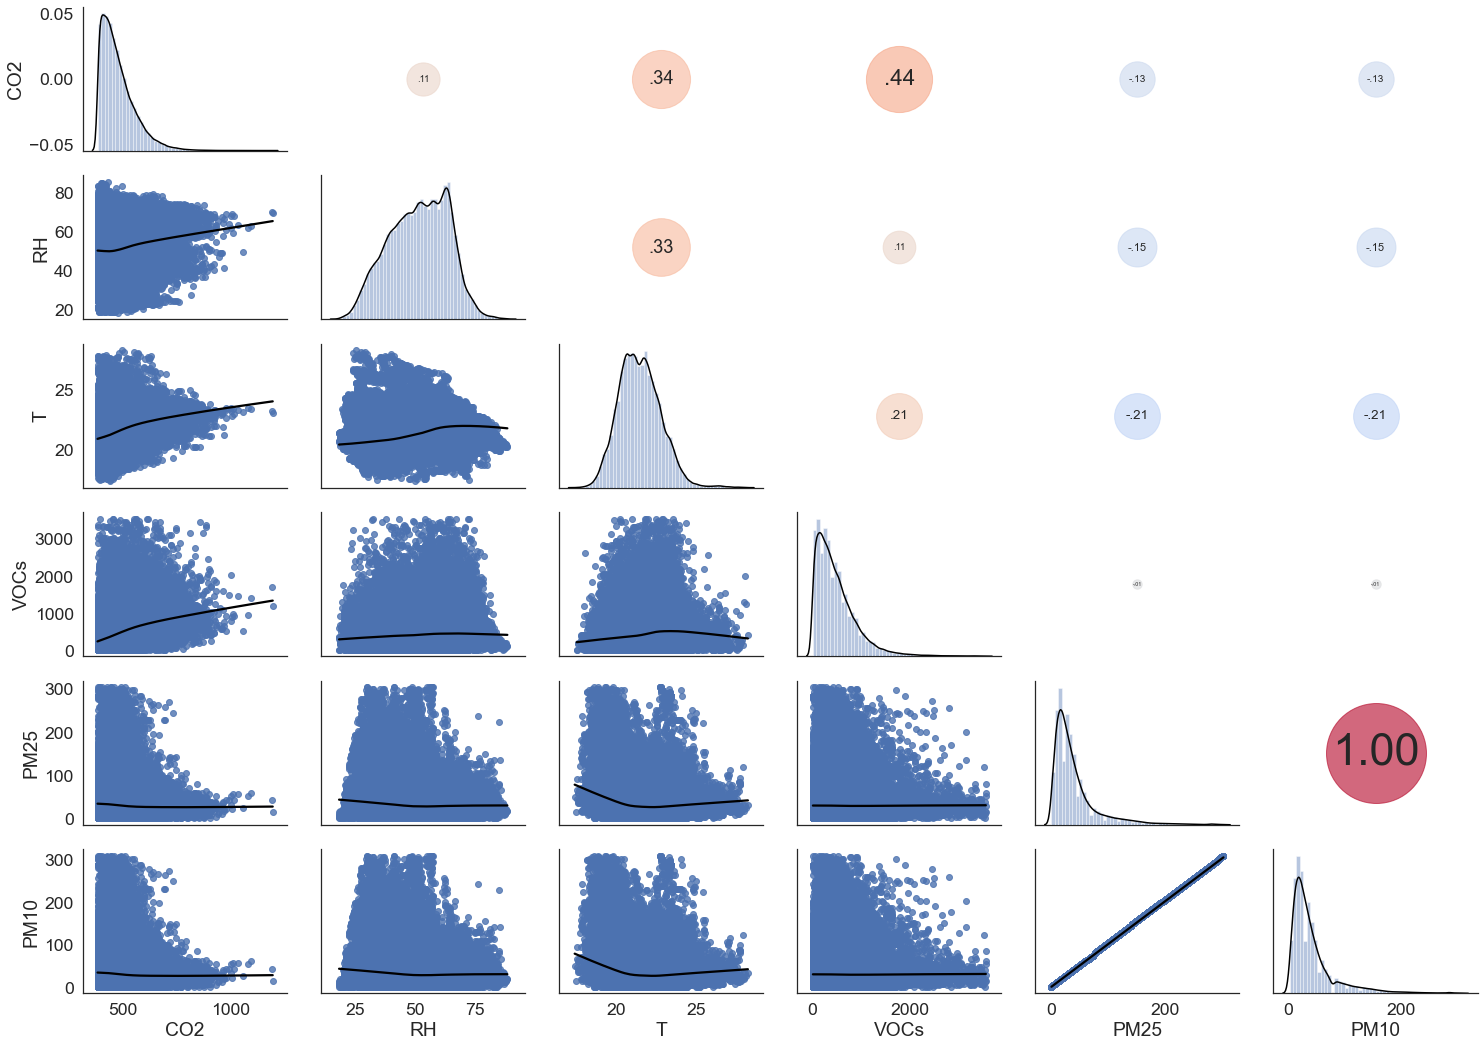

In [49]:
# Evaluation of Spearman correlations between IAQ parameters

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(datacfCorr, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

# Bigger figure
plt.rcParams['figure.figsize'] = [20, 10]

# To save the figure
plt.savefig('Fig7 - Spearman correlations between parameters @ '+ name)

C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

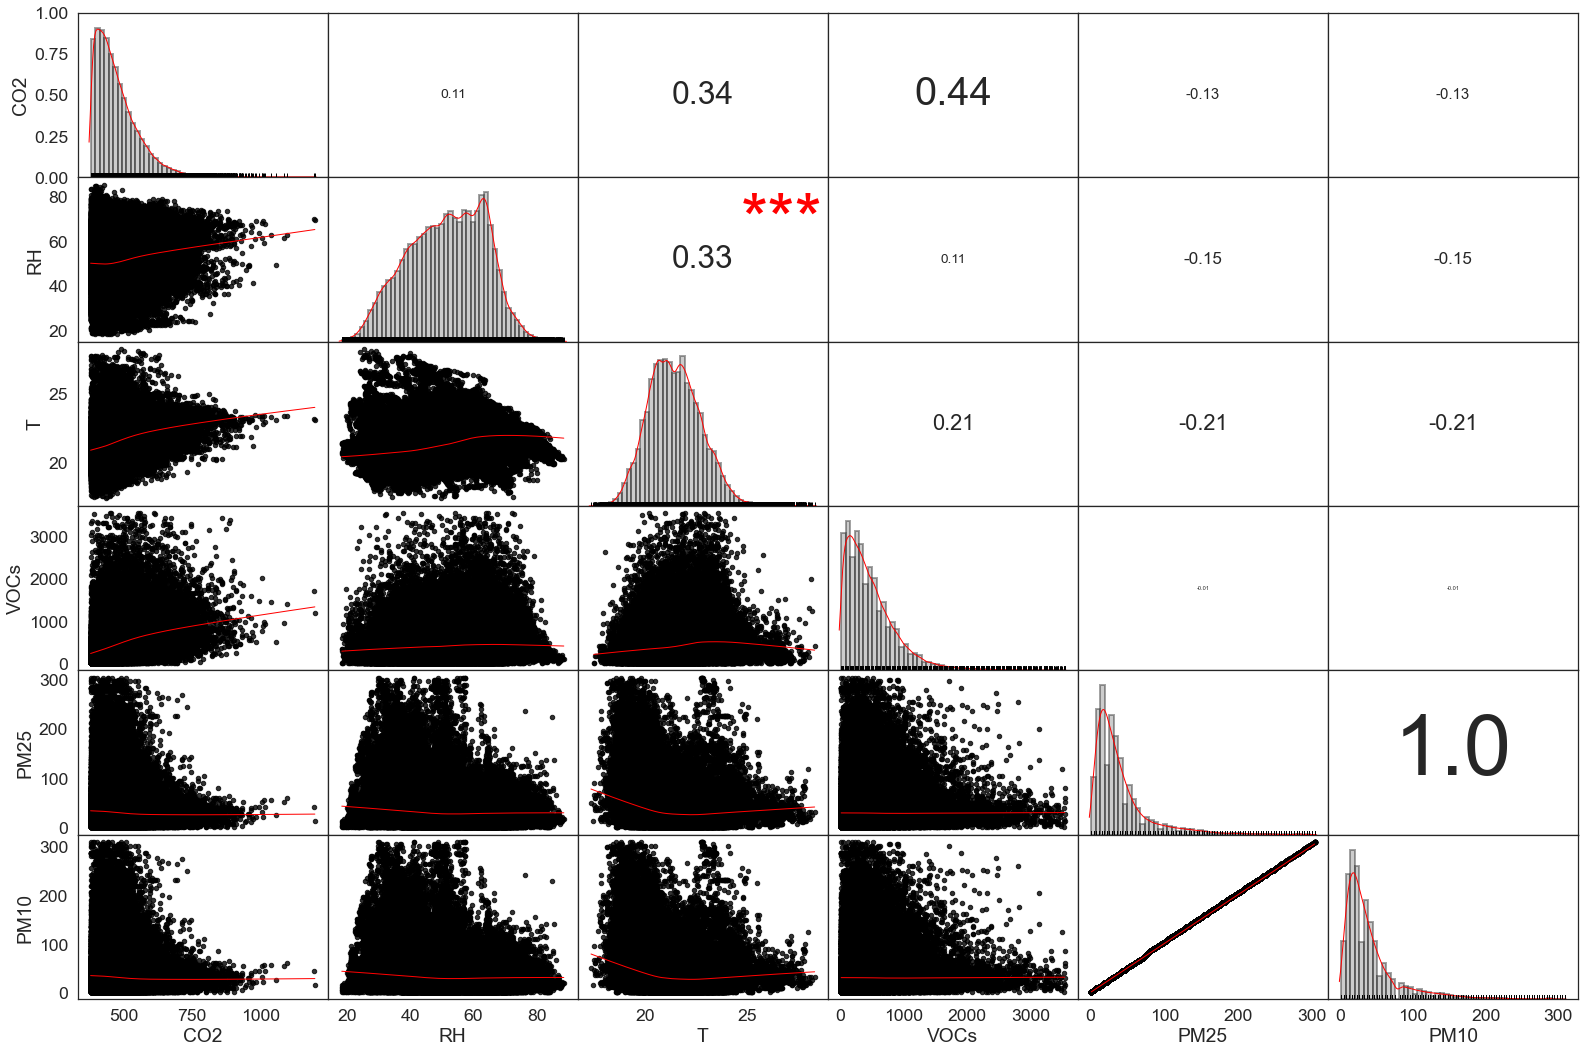

In [50]:
# Evaluation of Spearman correlations between IAQ parameters

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.spearmanr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(datacfCorr, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)
  

plt.savefig('Fig8 - Spearman correlations between parameters @ '+ name)

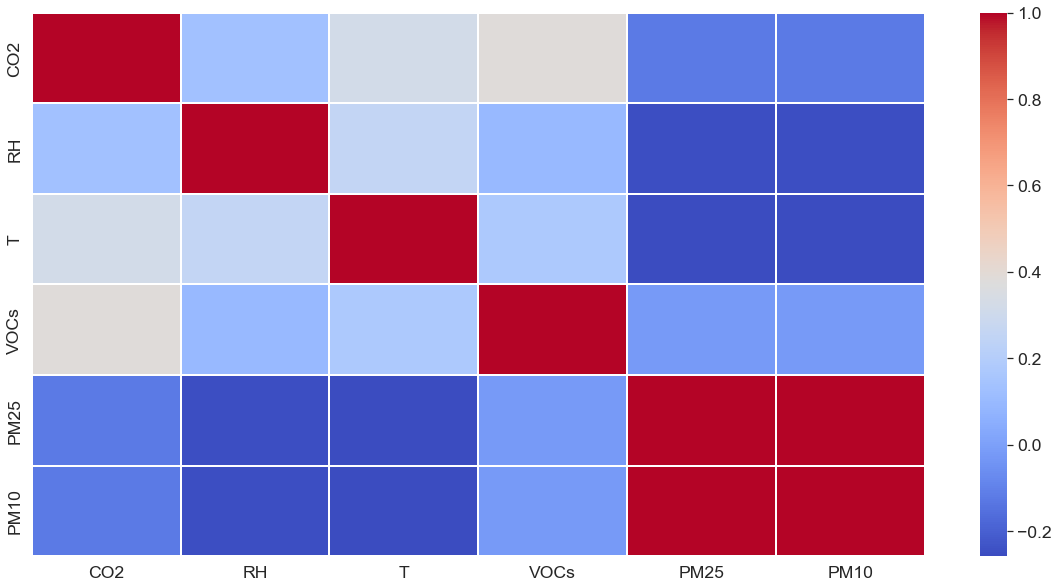

In [51]:
correlation = datacfCorr.corr()
ax = sns.heatmap(data=correlation, cmap='coolwarm', 
                 linewidths=2, cbar=True)

In [52]:
YearlyMeandata = datacfCorr.agg(['mean', 'std', 'count', 'median', 'min', 'max'])


# Export to csv
output_YearlyMeandata  = 'data_' + name + '_YearlyMeandata.csv'
YearlyMeandata.to_csv(output_YearlyMeandata, sep=',')

YearlyMeandata

,CO2,RH,T,VOCs,PM25,PM10
mean,475.548896,51.533444,21.466636,489.785400,40.797807,42.168103
std,77.719059,12.126021,1.305119,415.623471,39.902932,41.034204
count,83493.000000,104944.000000,104944.000000,86155.000000,104097.000000,104097.000000
median,456.531000,52.313396,21.388267,387.064400,28.815900,29.686800
min,380.232800,18.328900,17.367864,17.399000,1.049500,1.795600
max,1198.265400,88.575076,28.275467,3535.901000,303.009100,308.598800


In [53]:
# Hourly data for all parameters:
hourmean=datacf.groupby("Hour").agg("mean")
hourstd=datacf.groupby("Hour").agg("std")

# Export to csv
output_hourmean  = 'data_' + name + '_hourlymean.csv'
hourmean.to_csv(output_hourmean, sep=',')

output_hourstd  = 'data_' + name + '_hourlystd.csv'
hourstd.to_csv(output_hourstd, sep=',')